In [1]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [2]:
credit = pd.read_csv("D:/DA2210R1/data/Credit_Scoring.csv")

In [3]:
credit.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,9,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
1,10,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0
2,11,0,0.644226,30,0,0.309476,2500.0,5,0,0,0,0.0
3,12,0,0.018798,51,0,0.531529,6501.0,7,0,2,0,2.0
4,13,0,0.010352,46,0,0.298354,12454.0,13,0,2,0,2.0


In [4]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149992 entries, 0 to 149991
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            149992 non-null  int64  
 1   SeriousDlqin2yrs                      149992 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  149992 non-null  float64
 3   age                                   149992 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  149992 non-null  int64  
 5   DebtRatio                             149992 non-null  float64
 6   MonthlyIncome                         120262 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       149992 non-null  int64  
 8   NumberOfTimes90DaysLate               149992 non-null  int64  
 9   NumberRealEstateLoansOrLines          149992 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  149992 non-null  int64  
 11  

In [5]:
credit.isna()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,False,False,False,False,False,False,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
149987,False,False,False,False,False,False,False,False,False,False,False,False
149988,False,False,False,False,False,False,False,False,False,False,False,False
149989,False,False,False,False,False,False,True,False,False,False,False,False
149990,False,False,False,False,False,False,False,False,False,False,False,False


#### Thay thế giá trị khuyết thiếu bằng giá trị nội suy theo các cột

In [6]:
credit1 = credit.interpolate(axis = 1)

#### Thay thế giá trị khuyết thiếu bằng giá trị 0

In [7]:
credit2 = credit.fillna(0)

#### Vẽ biểu đồ boxplot, biểu đồ phân bố dữ liệu cho các cột

<AxesSubplot:>

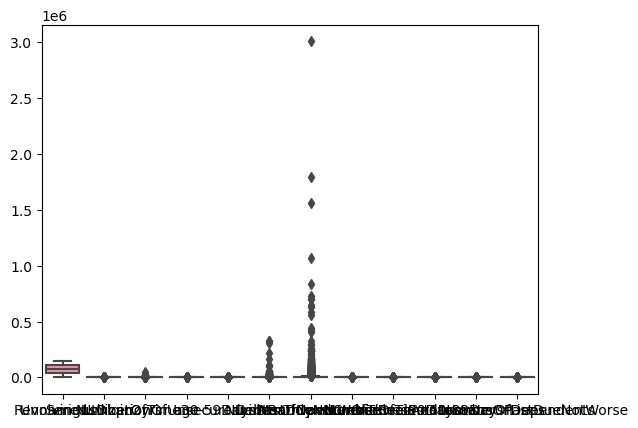

In [14]:
sns.boxplot(credit1)

<AxesSubplot:ylabel='Density'>

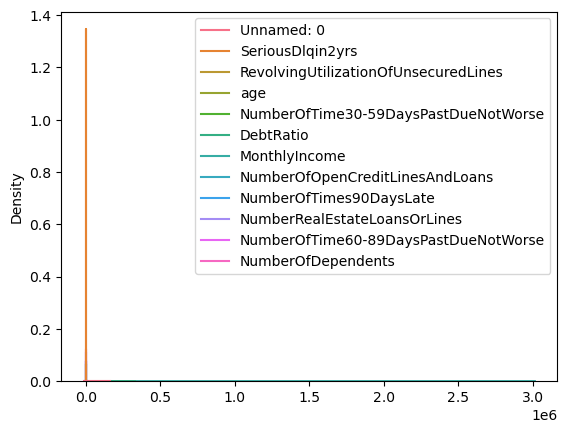

In [15]:
sns.kdeplot(credit1)

#### Loại bỏ giá trị ngoại lai

In [16]:
Q1 = credit1.quantile(0.25)
Q3 = credit1.quantile(0.75)
IQR = Q3 - Q1

In [17]:
credit1 = credit1[~((credit1 < (Q1 - 1.5 * IQR))|(credit1 > (Q3 - 1.5 * IQR)))]

#### Chia dữ liệu ở các cột age và MonthlyIncome thành 5 nhóm theo các khoảng: 0, 30, 40, 50, 80, 150 và đếm số lượng phần tử ở mỗi nhóm.

In [19]:
credit_age = pd.cut(credit1["age"], [0, 30, 40, 50, 80, 150])
credit_MonthlyIncome = pd.cut(credit1["MonthlyIncome"], [0, 30, 40, 50, 80, 150])

In [20]:
credit_age.value_counts()

(0, 30]      10756
(30, 40]         0
(40, 50]         0
(50, 80]         0
(80, 150]        0
Name: age, dtype: int64

In [21]:
credit_MonthlyIncome.value_counts()

(0, 30]      0
(30, 40]     0
(40, 50]     0
(50, 80]     0
(80, 150]    0
Name: MonthlyIncome, dtype: int64